In [48]:
import pandas as pd

In [49]:

audio_file = 'Dataset/audio_features_dataset_curated.csv'
df_song = pd.read_csv(audio_file)


In [50]:
def get_data_overview(df):
    print('Data overvirew of datasets')
    print('Shape of Datafrmae ',df.shape)
    df.isnull().sum()
    print('columns info',df.columns)
    print("Info",df.info())
    print("Check for null value",df.isnull().sum())
get_data_overview(df_song)

Data overvirew of datasets
Shape of Datafrmae  (43000, 19)
columns info Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          43000 non-null  object 
 1   artists           42999 non-null  object 
 2   album_name        42999 non-null  object 
 3   track_name        42999 non-null  object 
 4   popularity        43000 non-null  int64  
 5   duration_ms       43000 non-null  int64  
 6   explicit          43000 non-null  bool   
 7   danceability      43000 non-null  float64
 8   energy            43000 non-null  float64
 9   

In [51]:
get_data_overview(df_song)

Data overvirew of datasets
Shape of Datafrmae  (43000, 19)
columns info Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          43000 non-null  object 
 1   artists           42999 non-null  object 
 2   album_name        42999 non-null  object 
 3   track_name        42999 non-null  object 
 4   popularity        43000 non-null  int64  
 5   duration_ms       43000 non-null  int64  
 6   explicit          43000 non-null  bool   
 7   danceability      43000 non-null  float64
 8   energy            43000 non-null  float64
 9   

In [52]:
df_song.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4


In [53]:
df_audio= df_song.drop(columns=['explicit', 'mode', 'key', 'time_signature', 'popularity'])
df_audio.dropna(inplace=True)

In [54]:
df_audio.head()

,track_id,artists,album_name,track_name,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,230666,0.676,0.4610,-6.746,0.1430,0.0322,0.000001,0.3580,0.715,87.917
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,149610,0.420,0.1660,-17.235,0.0763,0.9240,0.000006,0.1010,0.267,77.489
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,210826,0.438,0.3590,-9.734,0.0557,0.2100,0.000000,0.1170,0.120,76.332
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,201933,0.266,0.0596,-18.515,0.0363,0.9050,0.000071,0.1320,0.143,181.740
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,198853,0.618,0.4430,-9.681,0.0526,0.4690,0.000000,0.0829,0.167,119.949


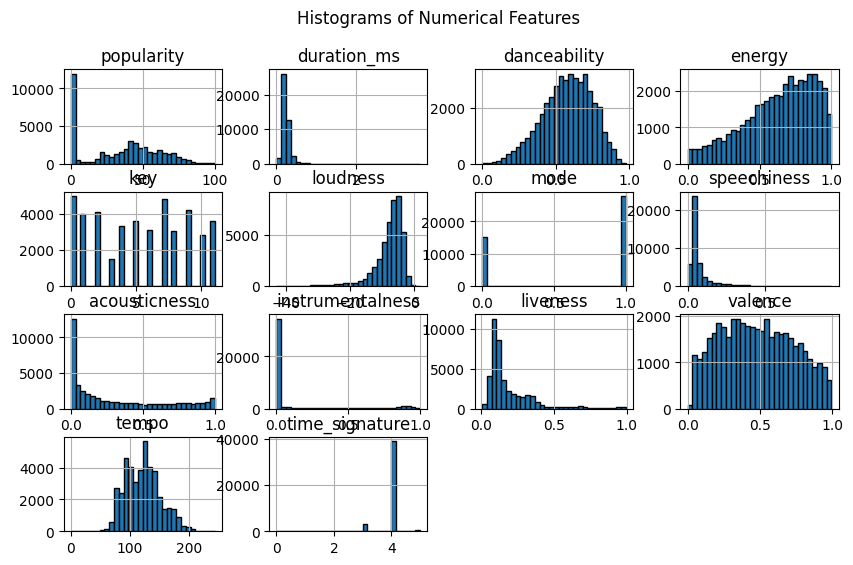

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for numerical columns
df_song.hist(figsize=(10, 6), bins=30, edgecolor="black")
plt.suptitle("Histograms of Numerical Features")
plt.show()


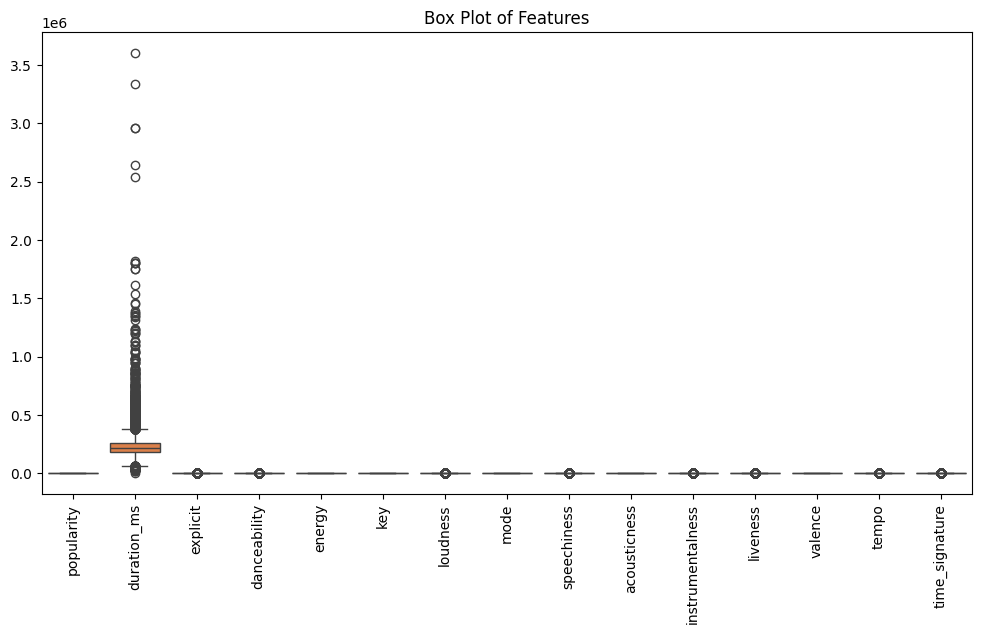

In [56]:
# Box plot to check distributions and outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_song)
plt.title("Box Plot of Features")
plt.xticks(rotation=90)  # Rotate labels for readability
plt.show()

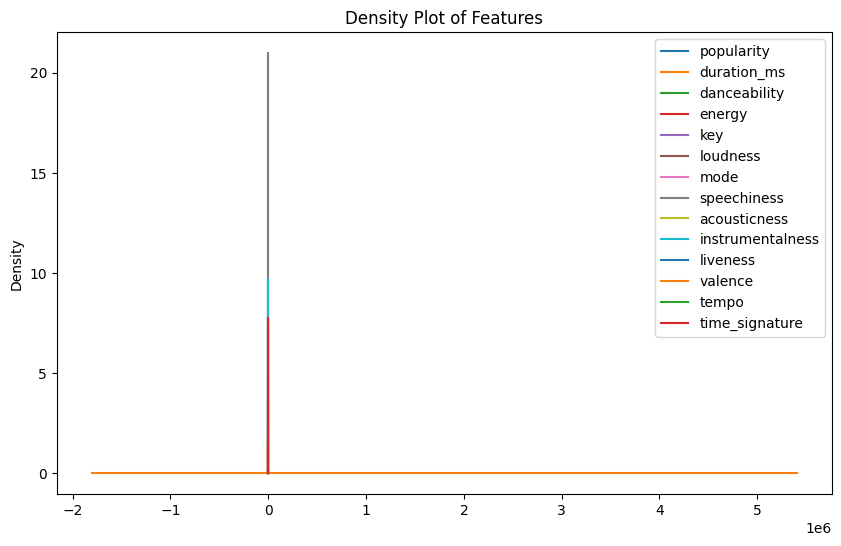

In [57]:
# KDE (Kernel Density Estimation) plot
df_song.plot(kind="kde", figsize=(10, 6), title="Density Plot of Features")
plt.show()

In [58]:
rows_with_nulls = df_song[df_song.isnull().any(axis=1)]

# Display the rows
print(rows_with_nulls)

                     track_id artists album_name track_name  popularity  \
24900  1kR4gIb7nGxHPI3D2ifs59     NaN        NaN        NaN           0   

       duration_ms  explicit  danceability  energy  key  loudness  mode  \
24900            0     False         0.501   0.583    7     -9.46     0   

       speechiness  acousticness  instrumentalness  liveness  valence  \
24900       0.0605          0.69           0.00396    0.0747    0.734   

         tempo  time_signature  
24900  138.391               4  


In [59]:
df_song.dropna(inplace=  True)

In [60]:
df_audio.dropna(inplace=  True)

In [61]:

import pickle

# Load the saved KMeans model
model_path = 'pickles/kmeans_12.pickle'
with open(model_path, 'rb') as f:
    kmeans_model = pickle.load(f)


In [62]:

from sklearn.preprocessing import StandardScaler

# Select and scale features
features = [
    "duration_ms", "danceability", "energy", "loudness", "speechiness",
    "acousticness", "instrumentalness", "liveness", "valence", "tempo"
]
X = df_audio[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Predict clusters
df_audio['cluster'] = kmeans_model.predict(X_scaled)



In [63]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


kmeans = KMeans(n_clusters=12 ,random_state=42)
kmeans.fit(X_scaled)
pred= kmeans.predict(X_scaled)

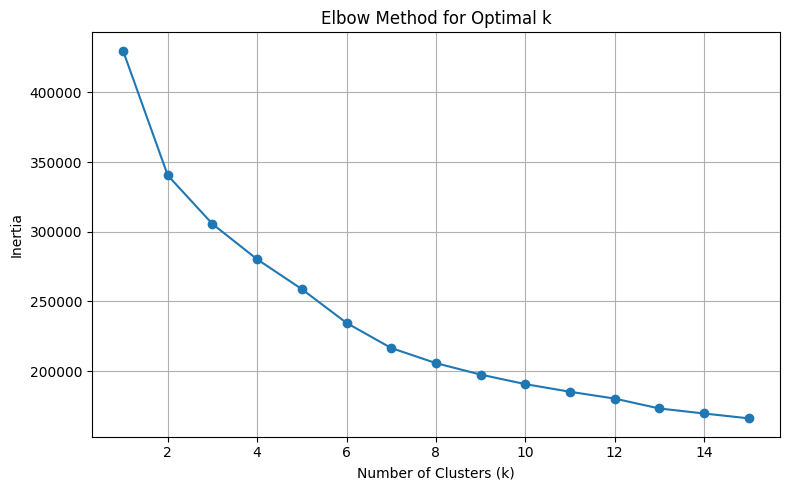

In [64]:
inertia = []

k_range = range(1, 16)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.tight_layout()
plt.show()


In [66]:
from sklearn.metrics import silhouette_score
import pickle
import os
# Define the directory name or path
directory_name = "pickles"

# Create the directory
os.makedirs(directory_name, exist_ok=True)

print(f"Directory '{directory_name}' created successfully.")

cluster_range= range(5, 25)
silhouette_scores= []


for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init = 5)
    cluster_labels = kmeans.fit_predict(X_scaled)
    #pickling
    filename = "pickles/kmeans_" + str(n_clusters) + ".pickle"
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)
    score = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(score)

Directory 'pickles' created successfully.


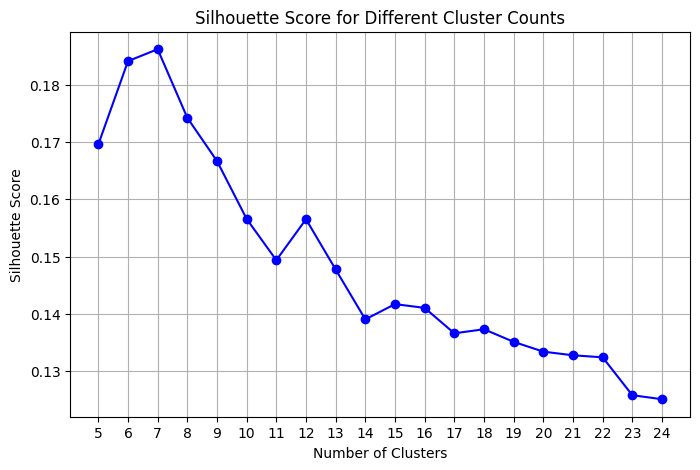

In [67]:
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different Cluster Counts")
plt.xticks(cluster_range)
plt.grid(True)
plt.show()






In [68]:
def load(filename = "filename.pickle"): 
    try: 
        with open("pickles/"+filename, "rb") as f: 
            return pickle.load(f) 
        
    except FileNotFoundError: 
        print("File not found!") 

In [118]:
kmeans12 = load("kmeans_18.pickle")


In [126]:
kmeans12.predict(X_scaled)

array([ 5, 15,  8, ...,  7,  0,  7], shape=(42999,), dtype=int32)

In [125]:
df_audio['cluster']

0        11
1         7
2         7
3         7
4         0
         ..
42995     4
42996     4
42997     1
42998     0
42999     1
Name: cluster, Length: 42999, dtype: int32

In [123]:

# Apply KMeans with 18 clusters
kmeans = KMeans(n_clusters=12, random_state=42)
df_audio['cluster'] = kmeans.fit_predict(X_scaled)


In [124]:

# Summarize cluster characteristics
cluster_summary = df_audio.groupby('cluster')[features].mean().round(2)
print(cluster_summary)


         duration_ms  danceability  energy  loudness  speechiness  \
cluster                                                             
0          264325.43          0.47    0.46     -8.67         0.04   
1          204306.30          0.65    0.44     -9.60         0.05   
2          207963.79          0.62    0.77     -5.73         0.07   
3          254629.44          0.51    0.75     -6.78         0.07   
4          197554.73          0.35    0.13    -22.51         0.05   
5          237769.34          0.41    0.85     -4.97         0.08   
6          207623.68          0.70    0.68     -6.58         0.32   
7          225838.67          0.42    0.26    -12.57         0.04   
8          231999.52          0.56    0.75     -5.84         0.05   
9          509286.53          0.59    0.71     -8.62         0.06   
10         198939.45          0.63    0.60     -9.30         0.06   
11         212807.23          0.73    0.75     -5.78         0.07   

         acousticness  instrument

In [127]:
cluster_labels = {
    0: "Live Energy",
    1: "Ambient/Instrumental",
    2: "Chill Pop",
    3: "Upbeat Rock",
    4: "Dance Pop",
    5: "Feel-Good Pop",
    6: "Rap/Trap",
    7: "Soft Acoustic",
    8: "High Energy EDM",
    9: "Indie Pop",
    10: "Instrumental",
    11: "Rock"
}
df_audio['label'] = df_audio['cluster'].map(cluster_labels)


In [128]:
"""cluster_labels = {
    0: "Indie Acoustic",
    1: "Dance Pop",
    2: "Feel-Good EDM",
    3: "Live Rock",
    4: "Ambient Instrumental",
    5: "Pop Bangers",
    6: "Rap/Trap",
    7: "Chill Acoustic",
    8: "Slow Indie",
    9: "Cinematic/Score",
    10: "Soft Instrumental",
    11: "Happy Pop",
    12: "Epic Instrumental",
    13: "High Energy Rock",
    14: "Electronic Ambient",
    15: "Lo-Fi Chill",
    16: "Power Pop",
    17: "Moody Indie"
}

df_audio['label'] = df_audio['cluster'].map(cluster_labels)
"""

'cluster_labels = {\n    0: "Indie Acoustic",\n    1: "Dance Pop",\n    2: "Feel-Good EDM",\n    3: "Live Rock",\n    4: "Ambient Instrumental",\n    5: "Pop Bangers",\n    6: "Rap/Trap",\n    7: "Chill Acoustic",\n    8: "Slow Indie",\n    9: "Cinematic/Score",\n    10: "Soft Instrumental",\n    11: "Happy Pop",\n    12: "Epic Instrumental",\n    13: "High Energy Rock",\n    14: "Electronic Ambient",\n    15: "Lo-Fi Chill",\n    16: "Power Pop",\n    17: "Moody Indie"\n}\n\ndf_audio[\'label\'] = df_audio[\'cluster\'].map(cluster_labels)\n'

In [129]:
df_audio

,track_id,artists,album_name,track_name,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster,label
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,230666,0.676,0.4610,-6.746,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,11,Rock
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,149610,0.420,0.1660,-17.235,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,7,Soft Acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,210826,0.438,0.3590,-9.734,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,7,Soft Acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,201933,0.266,0.0596,-18.515,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,7,Soft Acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,198853,0.618,0.4430,-9.681,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,0,Live Energy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,384999,0.172,0.2350,-16.393,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,4,Dance Pop
42996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,385000,0.174,0.1170,-18.318,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,Dance Pop
42997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,271466,0.629,0.3290,-10.895,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,1,Ambient/Instrumental
42998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,283893,0.587,0.5060,-10.889,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,0,Live Energy


In [130]:
import pandas as pd
import random

# Load your datasets
df_trending = pd.read_csv("playlist/top_100_billboard.csv")  # Make sure this has 'song_title' and 'artist'
  # Your labeled dataset

def recommend_song(music_type, df_trending, df_audio):
    music_type = music_type.strip().lower()

    if music_type == "trending now":
        if not df_trending.empty:
            song = df_trending.sample(1).iloc[0]
            return f"🔥 Trending Song: '{song.get('song_title', 'Unknown')}' by {song.get('artist', 'Unknown')}"
        else:
            return "⚠️ Trending list is empty."

    elif music_type in ["chill vibes", "high energy", "rock"]:
        filtered = df_audio[df_audio['label'].str.lower() == music_type]
        if not filtered.empty:
            song = filtered.sample(1).iloc[0]
            return f"🎧 Recommended: '{song.get('track_name', 'Unknown')}' by {song.get('artists', 'Unknown')} ({music_type.title()})"
        else:
            return f"⚠️ No songs found for category: {music_type.title()}"

    else:
        return "❓ Unknown category. Please choose from: Trending Now, Chill Vibes, High Energy, Rock."

# Example usage
print(recommend_song("Rock", df_trending, df_audio))
print(recommend_song("Chill Vibes", df_trending, df_audio))


🎧 Recommended: 'O Anjo Mais Velho' by O Teatro Mágico (Rock)
⚠️ No songs found for category: Chill Vibes


In [131]:
print(df_audio.columns)


Index(['track_id', 'artists', 'album_name', 'track_name', 'duration_ms',
       'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'cluster', 'label'],
      dtype='object')


In [132]:
def recommend_song(music_type, df_trending, df_audio):
    music_type = music_type.strip().lower()

    # Handle "Trending Now"
    if music_type == "trending now":
        if not df_trending.empty:
            song = df_trending.sample(1).iloc[0]
            return f"🔥 Trending Song: '{song.get('song_title', 'Unknown')}' by {song.get('artist', 'Unknown')}'"
        else:
            return "⚠️ Trending list is empty."

    # Handle cluster-based labels
    available_labels = df_audio['label'].dropna().str.lower().unique()
    if music_type in available_labels:
        filtered = df_audio[df_audio['label'].str.lower() == music_type]
        if not filtered.empty:
            song = filtered.sample(1).iloc[0]
            return f"🎧 Recommended: '{song.get('track_name', 'Unknown')}' by {song.get('artists', 'Unknown')} ({song.get('label', 'Unknown')})"
        else:
            return f"⚠️ No songs found for category: {music_type.title()}"

    # Unknown category
    formatted_labels = ", ".join(label.title() for label in sorted(available_labels))
    return f"❓ Unknown category. Please choose from: Trending Now, {formatted_labels}"


In [134]:
print(recommend_song("Dance Pop", df_trending, df_audio))
print(recommend_song("Trending Now", df_trending, df_audio))
print(recommend_song("Epic Instrumental", df_trending, df_audio))
print(recommend_song("Rock", df_trending, df_audio))
print(recommend_song("Trending Now", df_trending, df_audio))
print(recommend_song("Indie Acoustic", df_trending, df_audio))


🎧 Recommended: 'Wrong Floor' by Cliff Martinez (Dance Pop)
🔥 Trending Song: 'Unknown' by Unknown'
❓ Unknown category. Please choose from: Trending Now, Ambient/Instrumental, Chill Pop, Dance Pop, Feel-Good Pop, High Energy Edm, Indie Pop, Instrumental, Live Energy, Rap/Trap, Rock, Soft Acoustic, Upbeat Rock
🎧 Recommended: 'I Miss You' by blink-182 (Rock)
🔥 Trending Song: 'Unknown' by Unknown'
❓ Unknown category. Please choose from: Trending Now, Ambient/Instrumental, Chill Pop, Dance Pop, Feel-Good Pop, High Energy Edm, Indie Pop, Instrumental, Live Energy, Rap/Trap, Rock, Soft Acoustic, Upbeat Rock
